# BTC price analysis

In [55]:
#!pip install yfinance
import yfinance as yf
import datetime as dt
import pandas as pd

start = dt.datetime(2010,3,1)
end = dt.datetime(2024,3,2)

df = yf.download('BTC-AUD', start, end)


[*********************100%%**********************]  1 of 1 completed


In [56]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-26,78665.468750,79180.101562,78279.570312,78820.445312,78820.445312,23483518834
2024-02-27,78816.343750,84033.539062,77795.875000,83375.875000,83375.875000,52106726970
2024-02-28,83371.226562,87965.406250,83398.804688,87236.039062,87236.039062,76036798491
2024-02-29,87214.226562,98355.726562,86821.304688,96242.187500,96242.187500,128168074295
2024-03-01,96233.554688,97557.101562,93069.312500,94151.382812,94151.382812,100764048450


In [57]:
# df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3454 entries, 2014-09-17 to 2024-03-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3454 non-null   float64
 1   High       3454 non-null   float64
 2   Low        3454 non-null   float64
 3   Close      3454 non-null   float64
 4   Adj Close  3454 non-null   float64
 5   Volume     3454 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 188.9 KB


## Simple BTC graphing

### BTC Price

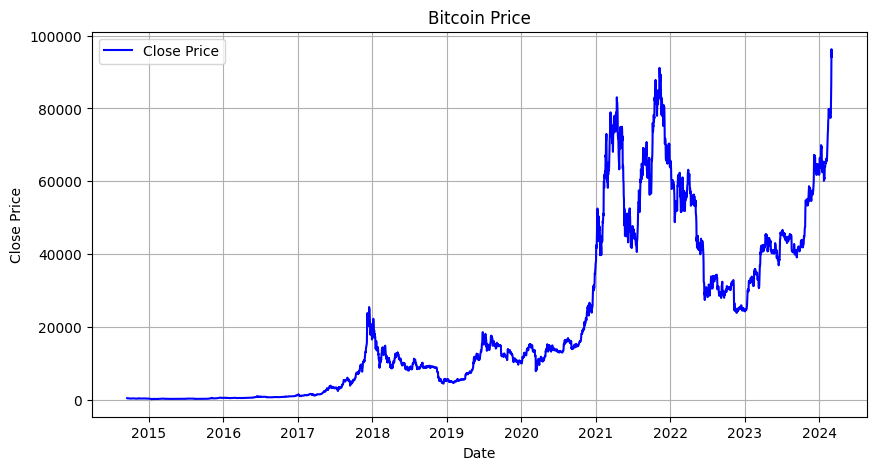

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], linestyle='-', color='b', label='Close Price')
plt.title('Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

### BTC logged price

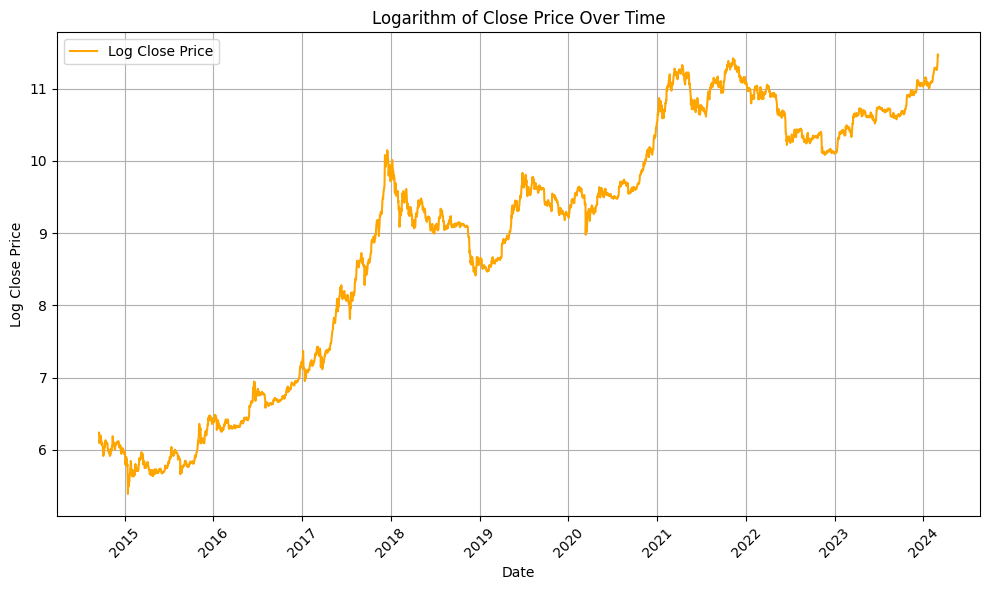

In [59]:
import numpy as np

df['Log_Close'] = np.log(df['Close'])

# Plotting the logarithm of the close price
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Log_Close'], label='Log Close Price', color='orange')
plt.title('Logarithm of Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Log Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Checking for autocorrelation

### Making data stationary for unbiased estimates

We take the I(1) (intergrated to the first order) approach by differencing (i.e. taking the growth rate of logged prices).

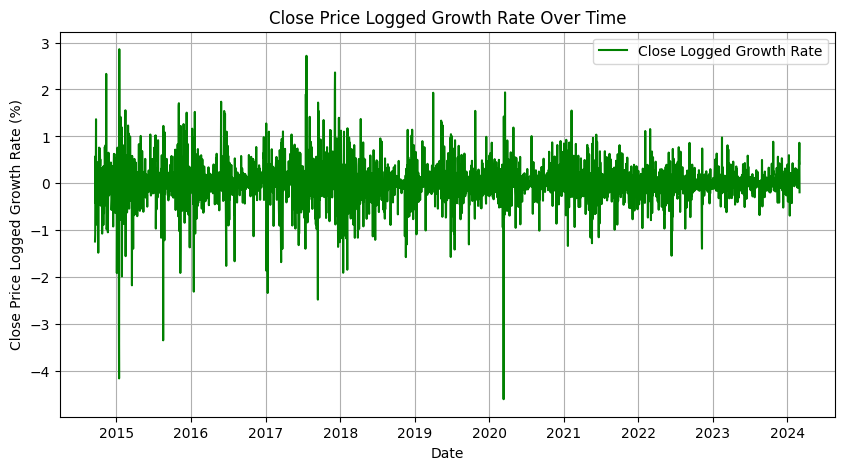

In [60]:
# Calculate the daily percentage change (growth rate)
df['Close_Log_Growth_Rate'] = df['Log_Close'].pct_change() * 100
# Also make just the growth rate for later analysis
df['Close_Growth_Rate'] = df['Close'].pct_change() * 100


# Plotting growth rate on its own
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close_Log_Growth_Rate'], linestyle='-', color='g', label='Close Logged Growth Rate')
plt.title('Close Price Logged Growth Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price Logged Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming df is your DataFrame and 'Close_Log_Growth_Rate' is the column you want to test
# Perform Augmented Dickey-Fuller test
result = adfuller(df['Close_Log_Growth_Rate'].dropna())

# Output the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if result[1] > 0.05:
    print("The series is not stationary")
else:
    print("The series is stationary")


ADF Statistic: -18.433370
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
The series is stationary


### Deciding upon sample

We decide to try 2 different samples to test for any autocorrelation in BTC price (as it is difficult to test daily prices over a decade of time):
1. Daily data over 1 year: for short term fluctuation analysis
2. Monthly data for 5 years: for long term trend analysis
3. Intraday data over 1 week (recorded at 5 minute intervals): for extremely short-term analysis

In [69]:
#!pip install yfinance
import yfinance as yf
import datetime as dt
import pandas as pd

# 1. Daily data over 1 year

daily_data_1yr = df.last('365D')

# 2. Monthly data for 5 years

monthly_data_5yr = df.last('5Y').resample('M').mean()

# 3. Intra-day data for 1 week

start_forIntraDay = dt.datetime(2024,2,24)
end_forIntraDay = dt.datetime(2024,3,2)
minute_data_1wk = yf.download('BTC-AUD', start_forIntraDay, end_forIntraDay, interval='1m')
# Calculate logged price
minute_data_1wk['Log_Close'] = np.log(minute_data_1wk['Close'])
# Calculate the daily percentage change (growth rate)
minute_data_1wk['Close_Log_Growth_Rate'] = minute_data_1wk['Log_Close'].pct_change() * 100
# Also make just the growth rate alone
minute_data_1wk['Close_Growth_Rate'] = minute_data_1wk['Close'].pct_change() * 100
# Drop all rows with NaN values
minute_data_1wk.dropna(inplace=True)

daily_data_1yr.head(), monthly_data_5yr.head(), minute_data_1wk.head()

/var/folders/1c/xdsm7htj4334pn2n9vx5kz900000gn/T/ipykernel_1757/2681600539.py:8: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  daily_data_1yr = df.last('365D')
/var/folders/1c/xdsm7htj4334pn2n9vx5kz900000gn/T/ipykernel_1757/2681600539.py:12: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  monthly_data_5yr = df.last('5Y').resample('M').mean()


[*********************100%%**********************]  1 of 1 completed


(                    Open          High           Low         Close  \
 Date                                                                 
 2023-03-03  34875.359375  34879.886719  32809.906250  33041.796875   
 2023-03-04  33042.156250  33102.437500  32797.796875  33025.867188   
 2023-03-05  33027.039062  33410.500000  32957.601562  33217.597656   
 2023-03-06  33219.523438  33526.722656  33073.078125  33317.765625   
 2023-03-07  33315.636719  33416.160156  33403.851562  33722.808594   
 
                Adj Close       Volume  Log_Close  Close_Log_Growth_Rate  \
 Date                                                                      
 2023-03-03  33041.796875  38508297433  10.405529              -0.515872   
 2023-03-04  33025.867188  16497181114  10.405046              -0.004634   
 2023-03-05  33217.597656  19716899742  10.410835               0.055633   
 2023-03-06  33317.765625  25776901263  10.413846               0.028922   
 2023-03-07  33722.808594  34550990217  10.42

### Testing for autocorrelation and modelling

#### Short term (daily data over 1 year)

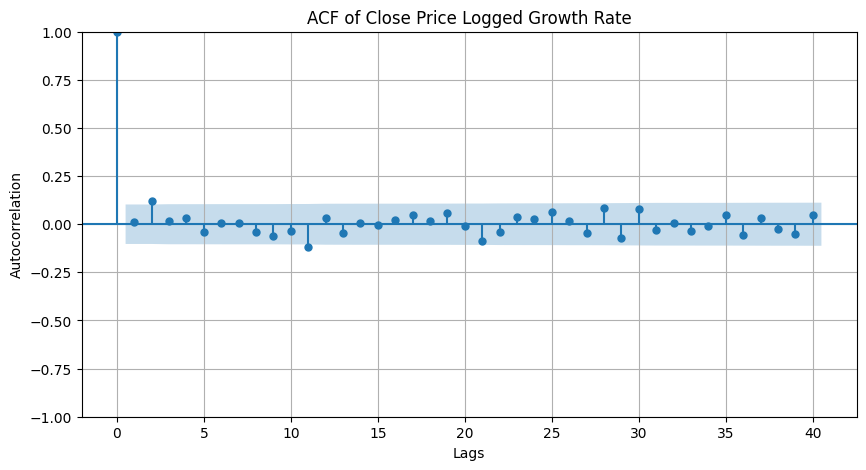

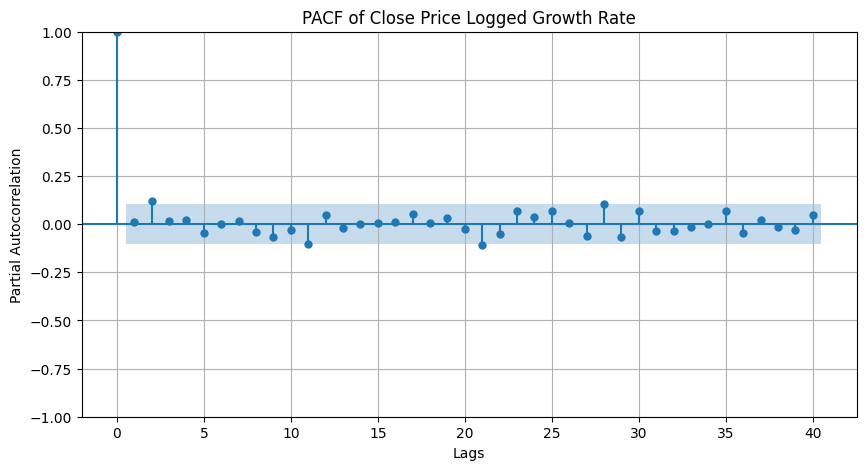

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
plt.figure(figsize=(10, 5))
plot_acf(daily_data_1yr['Close_Log_Growth_Rate'].dropna(), ax=plt.gca(), lags=40)
plt.title('ACF of Close Price Logged Growth Rate')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# PACF plot
plt.figure(figsize=(10, 5))
plot_pacf(daily_data_1yr['Close_Log_Growth_Rate'].dropna(), ax=plt.gca(), lags=40, method='ywm')
plt.title('PACF of Close Price Logged Growth Rate')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

The fact that both ACF and PACF truncate after the second lag might suggest that a mixed ARMA model is not necessary, and a simpler AR(p) or MA(q) model might be adequate for modeling the time series.

As the second lag is significant in the ACF and PACF, we test for autocorrelation using an AR(2) and MA(2) and test for which has a lower AIC to measure model suitability.

##### Testing AR(2)

In [64]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Initialise and fit the ARIMA model with order (2,0,0) for AR(2) process
model = ARIMA(daily_data_1yr['Close_Log_Growth_Rate'].dropna(), order=(2,0,0))
model_fit = model.fit()

# Print out the summary of the model
print(model_fit.summary())

# You can also make predictions
# For example, to forecast the next 5 values:
forecast = model_fit.forecast(steps=5)
print(forecast)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                 
Dep. Variable:     Close_Log_Growth_Rate   No. Observations:                  365
Model:                    ARIMA(2, 0, 0)   Log Likelihood                  48.724
Date:                   Sun, 03 Mar 2024   AIC                            -89.448
Time:                           16:07:52   BIC                            -73.848
Sample:                       03-03-2023   HQIC                           -83.248
                            - 03-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0251      0.013      1.902      0.057      -0.001       0.051
ar.L1          0.0095      0.047      0.201      0.840      -0.083       0.102
ar.L2          0.1275      0

The first lag is insignificant, but the second lag is significant. To exclude the first lag, we'd have to include the second lag as basically an exogenous variable. This is difficult to interpret in a model, so I will refrain from doing so.

##### Testing MA(2)

In [65]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Initialise and fit the ARIMA model with order (2,0,0) for AR(2) process
model = ARIMA(daily_data_1yr['Close_Log_Growth_Rate'].dropna(), order=(0,0,2))
model_fit = model.fit()

# Print out the summary of the model
print(model_fit.summary())

# You can also make predictions
# For example, to forecast the next 5 values:
forecast = model_fit.forecast(steps=5)
print(forecast)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                 
Dep. Variable:     Close_Log_Growth_Rate   No. Observations:                  365
Model:                    ARIMA(0, 0, 2)   Log Likelihood                  48.548
Date:                   Sun, 03 Mar 2024   AIC                            -89.097
Time:                           16:07:53   BIC                            -73.497
Sample:                       03-03-2023   HQIC                           -82.897
                            - 03-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0251      0.013      1.963      0.050    3.95e-05       0.050
ma.L1          0.0041      0.047      0.089      0.929      -0.087       0.095
ma.L2          0.1201      0

Similar results as with AR(2). Modelling an ARMA(2,2) doesnt help either.

In sum, AR and MA modelling is not appropriate for residuals of BTC growth rate.

#### Long term (monthly data over 5 years)

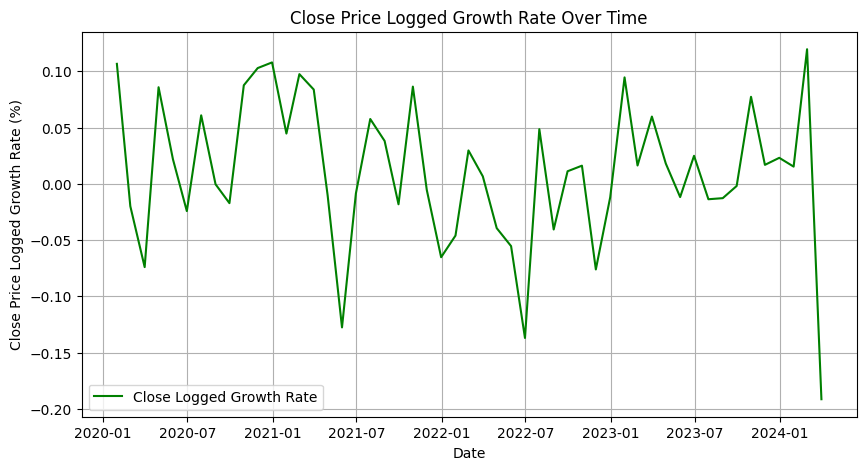

In [66]:
# Plotting growth rate on its own
plt.figure(figsize=(10, 5))
plt.plot(monthly_data_5yr.index, monthly_data_5yr['Close_Log_Growth_Rate'], linestyle='-', color='g', label='Close Logged Growth Rate')
plt.title('Close Price Logged Growth Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price Logged Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
## Test for stationarity in this new df first:

import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(monthly_data_5yr['Close_Log_Growth_Rate'].dropna())

# Output the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if result[1] > 0.05:
    print("The series is not stationary")
else:
    print("The series is stationary")

ADF Statistic: -6.075511
p-value: 0.000000
Critical Values:
	1%: -3.568
	5%: -2.921
	10%: -2.599
The series is stationary


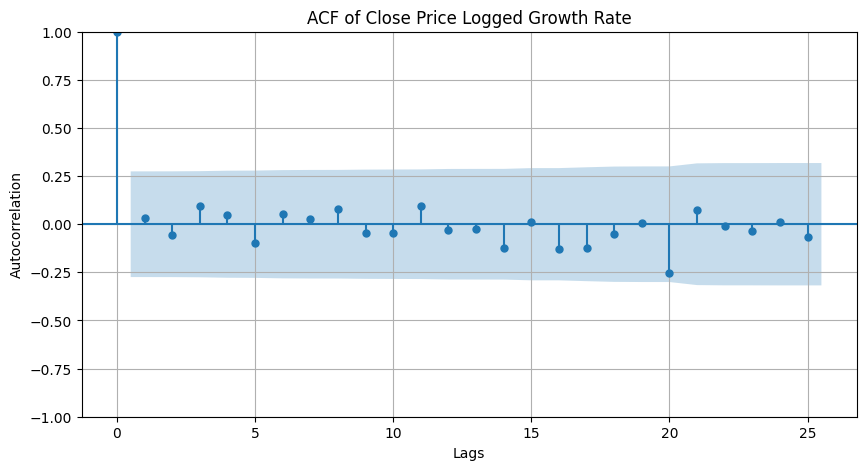

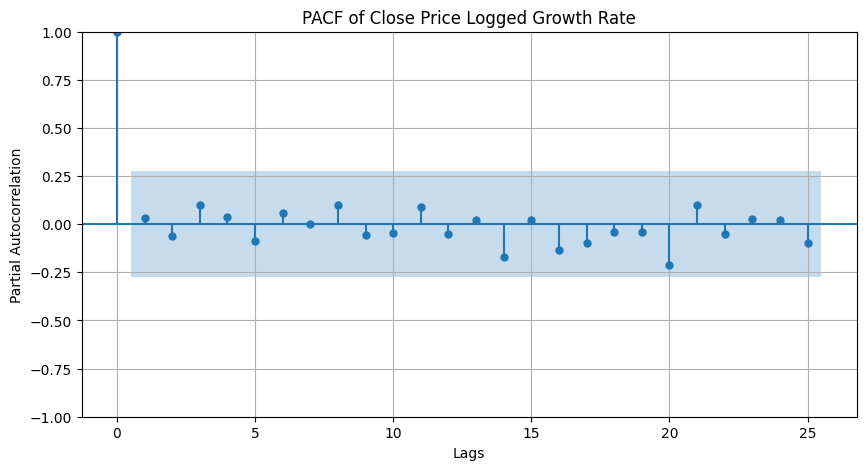

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
plt.figure(figsize=(10, 5))
plot_acf(monthly_data_5yr['Close_Log_Growth_Rate'].dropna(), ax=plt.gca(), lags=25)
plt.title('ACF of Close Price Logged Growth Rate')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# PACF plot
plt.figure(figsize=(10, 5))
plot_pacf(monthly_data_5yr['Close_Log_Growth_Rate'].dropna(), ax=plt.gca(), lags=25, method='ywm')
plt.title('PACF of Close Price Logged Growth Rate')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

There is no autocorrelation at any of the lags. No autocorrelation modelling of the error term is required.

#### Extreme short term (intra-day minute-by-minute)

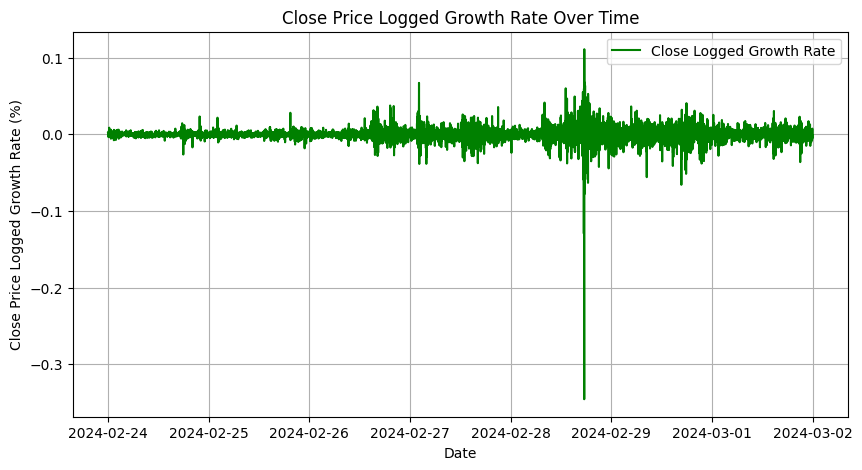

In [70]:
# Plotting growth rate on its own
plt.figure(figsize=(10, 5))
plt.plot(minute_data_1wk.index, minute_data_1wk['Close_Log_Growth_Rate'], linestyle='-', color='g', label='Close Logged Growth Rate')
plt.title('Close Price Logged Growth Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price Logged Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
## Test for stationarity in this new df first:

import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(minute_data_1wk['Close_Log_Growth_Rate'].dropna())

# Output the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if result[1] > 0.05:
    print("The series is not stationary")
else:
    print("The series is stationary")

ADF Statistic: -15.502151
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
The series is stationary


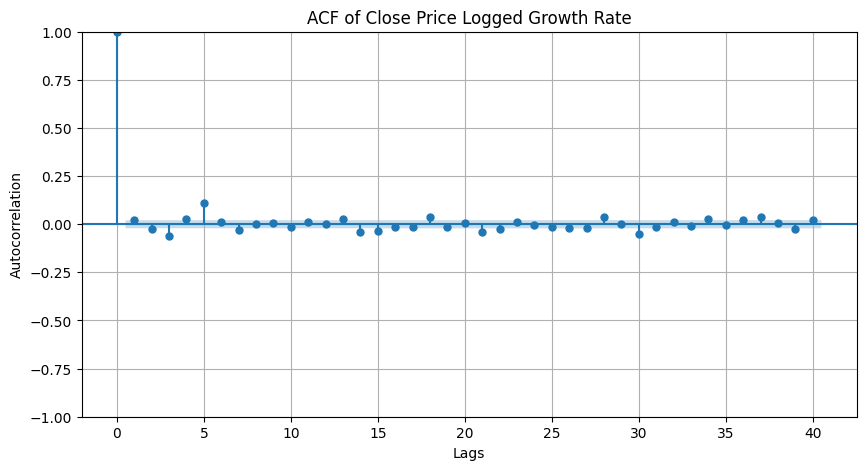

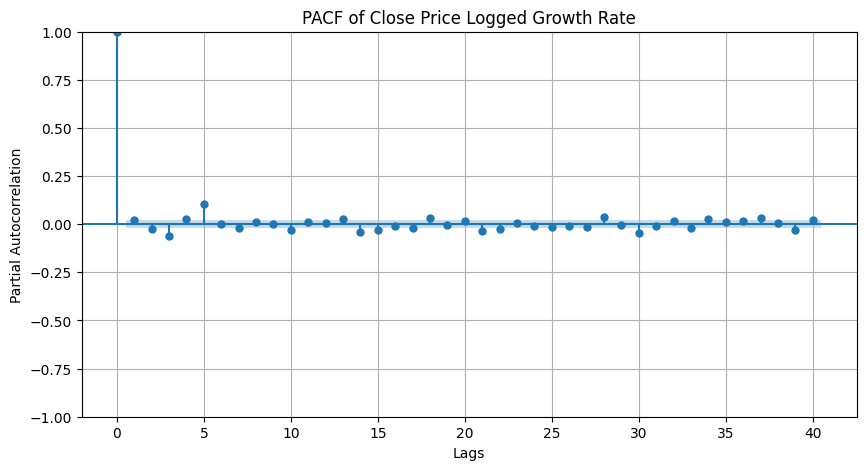

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
plt.figure(figsize=(10, 5))
plot_acf(minute_data_1wk['Close_Log_Growth_Rate'].dropna(), ax=plt.gca(), lags=40)
plt.title('ACF of Close Price Logged Growth Rate')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# PACF plot
plt.figure(figsize=(10, 5))
plot_pacf(minute_data_1wk['Close_Log_Growth_Rate'].dropna(), ax=plt.gca(), lags=40, method='ywm')
plt.title('PACF of Close Price Logged Growth Rate')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

Both ACF and PACF are truncated and both have 5 lags that are significant. Both graphs exhibit a sine wave pattern.

## What actually affects the price of BTC if not its past values?

